In [2]:
import scipy.stats as sp
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
import cv2 

<class 'numpy.ndarray'>
(512, 512)
<class 'numpy.uint8'>
(512, 512)
(512, 512)


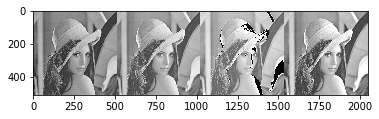

In [3]:
img = cv2.imread('./data/lena.png', cv2.IMREAD_GRAYSCALE)
print(type(img))
print(img.shape)# 512x512x3 이면 크기512 색 채널 3개 
print(type(img[0,0])) #<class 'numpy.uint8'> , 0~ 255 까지
img2 = img + 20
print(img2.shape)
img3 = img + 50 #img3 경우 색 값이 255가 넘어 오버플로우가 발생, 클래핑기법적용 ㄱㄱ
print(img3.shape)

#plt.imshow( np.hstack([img,img2, img3]), cmap='gray') 
plt.show()

# 32비트(4바이트) int형 변경
img4 = img.astype(np.float32)# float 형식으로 변경 
img4 *= 1.2
img4 = np.clip(img4,0,255).astype(np.uint8) # 값이 255보다 크면 255로 클래핑 하라
#img4 = img.astype(np.uint8)


#print(type(imgint[0,0])) #<class 'numpy.int32'> , 4바이트 
plt.imshow( np.hstack([img,img2, img3,img4]), cmap='gray') 
plt.show()

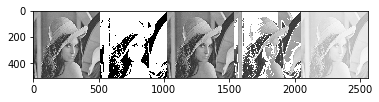

In [9]:
def mullut(op):
    return np.array([255 if x*op > 255 else x 
                     for x in range(256) ]).astype('uint8') #타입을 양수형 int8로 변경해주어야 함

#경계값을 활용한 이진화 (삼항 연산)
def bin_mullut(op):
    return np.array([255 if x > op else 0 
                     for x in range(256) ]).astype('uint8')

# #경계값을 활용한 이진화 (자동 형변환)
# def bin_mullut(op):
#     return np.array([ (x>op)*255  for x in range(256) ]).astype('uint8')


#계단식으로 올라가는 포스터라이징
def posterrize_lut(op):
    return np.array([int(x/op)*op
                     for x in range(256) ]).astype('uint8')


#범위 강조 변환
def range_highlight_lut(op1,op2):
    return np.array([255 if x >= op1 and x <= op2 else x
                     for x in range(256) ]).astype('uint8')

#감마lut
def gamma_lut(gamma):
    invGamma = 1.0/gamma
    return np.array([(x / 255.0)**invGamma*255
                     for x in range(256) ]).astype('uint8')


#src2 = cv2.LUT(img, mullut(1.2)) #lut 타입은 넘파이 타입이어야 서로 연산할 수 있음
#print(src2)
#plt.imshow(src2, cmap='gray')
#plt.show()
#src2 = cv2.LUT(img, mullut(2.0))
#plt.imshow(src2, cmap='gray')
#plt.show()

all_show = np.hstack([
    cv2.LUT(img, mullut(0.7)), 
    cv2.LUT(img, bin_mullut(100)), 
    cv2.LUT(img, posterrize_lut(8)), 
    cv2.LUT(img, range_highlight_lut(100,150)),
    cv2.LUT(img, gamma_lut(5))
])
plt.imshow(all_show, cmap='gray')
plt.show()

In [8]:
a = cv2.LUT(img, posterrize_lut(8))
print(a[1])


a = cv2.LUT(img, range_highlight_lut(100,150))
print(a[1])


a = cv2.LUT(img, gamma_lut(5))
print(a[1])

[168 168 168 160 168 160 168 160 168 160 168 160 160 168 160 160 160 160
 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160 160
 160 168 160 168 168 168 168 176 176 176 176 176 176 176 168 176 168 168
 168 168 152 152 160 144 136 128 128 112 104 104 104  96  96 104 112 104
 112 104 112 112 112 112 112 120 120 112 112 112 112 112 112 120 112 112
 112 112 120 120 112 120 112 120 120 112 112 112 112 112 112 120 120 120
 120 128 128 128 120 128 128 128 128 128 128 136 136 136 136 128 128 136
 136 136 136 136 144 136 136 136 136 136 136 144 136 144 136 136 136 136
 144 136 136 136 136 136 136 136 136 136 136 136 144 144 144 144 136 144
 136 144 136 144 144 144 144 144 144 144 144 144 144 144 144 144 136 144
 136 136 136 144 144 144 144 144 136 136 136 136 144 144 136 144 144 144
 144 144 144 144 136 144 144 144 136 136 144 136 136 144 136 136 136 136
 136 136 136 136 136 136 136 136 136 136 144 136 136 144 136 144 136 136
 136 136 136 136 136 144 144 144 136 144 144 144 14

In [29]:
a = cv2.LUT(img, range_highlight_lut(80,130))
print(img[1])
#print(posterrize_lut(8))

print(a[1])



[169 169 168 167 169 164 170 167 170 167 169 167 163 169 166 162 164 163
 167 167 162 164 163 164 161 164 163 161 163 162 161 164 162 165 164 166
 166 173 167 173 173 173 173 177 177 181 179 176 178 178 174 180 175 173
 170 168 159 157 161 150 140 133 128 117 110 110 106 103 101 106 112 107
 112 110 114 115 116 116 116 122 120 119 118 117 116 119 118 120 118 119
 118 119 122 120 118 120 119 120 120 118 115 116 118 119 119 122 126 123
 125 128 132 130 125 134 132 132 134 133 132 136 136 140 140 134 135 139
 142 142 142 141 145 140 139 141 141 139 143 145 142 144 143 142 139 141
 144 138 140 137 142 140 140 140 139 141 139 139 144 144 144 144 140 145
 142 144 143 144 144 145 144 145 144 146 145 144 144 144 146 144 143 144
 143 143 141 144 144 144 145 145 142 142 143 142 144 145 143 144 146 146
 144 146 145 144 143 145 145 146 142 141 147 142 143 147 143 142 140 142
 141 137 142 142 143 143 140 143 141 139 144 142 143 144 140 144 143 143
 143 143 142 143 143 144 145 144 143 145 144 144 14